In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('video_game.csv')

In [3]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [5]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [6]:
df.drop('img', axis=1, inplace=True)

In [7]:
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


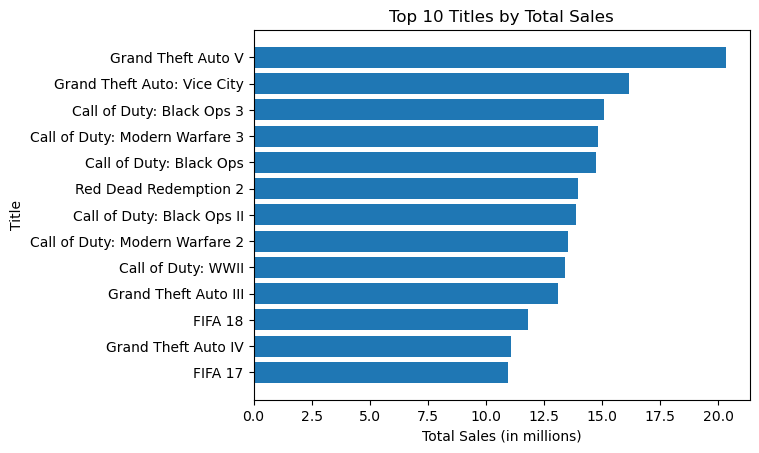

In [8]:
# Top 10 titles by sales
top_10_titles = df.sort_values(by='total_sales', ascending=False).head(20)

plt.barh(top_10_titles['title'], top_10_titles['total_sales'])
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Title')
plt.title('Top 10 Titles by Total Sales')
plt.gca().invert_yaxis()
plt.show()


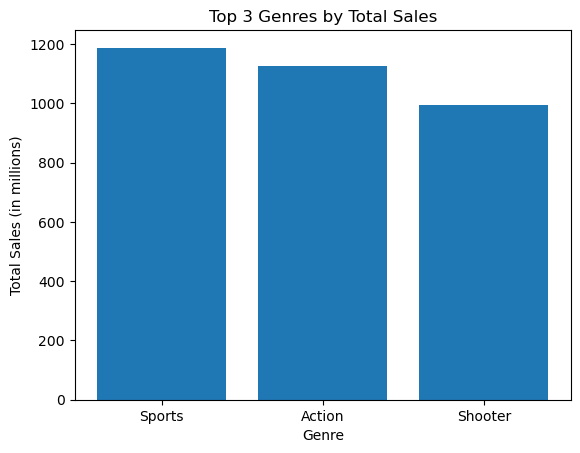

In [9]:
# Top 3 genres by sales
genre_sales = df.groupby('genre')['total_sales'].sum().reset_index()

top_3_genres = genre_sales.sort_values(by='total_sales', ascending=False).head(3)

plt.bar(top_3_genres['genre'], top_3_genres['total_sales'])
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.title('Top 3 Genres by Total Sales')
plt.show()


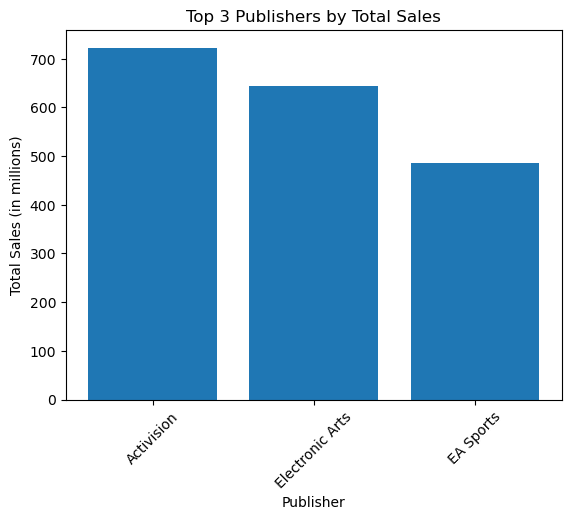

In [11]:
# Top 3 publishers by sales
publisher_sales = df.groupby('publisher')['total_sales'].sum().reset_index()

top_3_publishers = publisher_sales.sort_values(by='total_sales', ascending=False).head(3)

plt.bar(top_3_publishers['publisher'], top_3_publishers['total_sales'])
plt.xlabel('Publisher')
plt.ylabel('Total Sales (in millions)')
plt.title('Top 3 Publishers by Total Sales')
plt.xticks(rotation=45) 
plt.show()


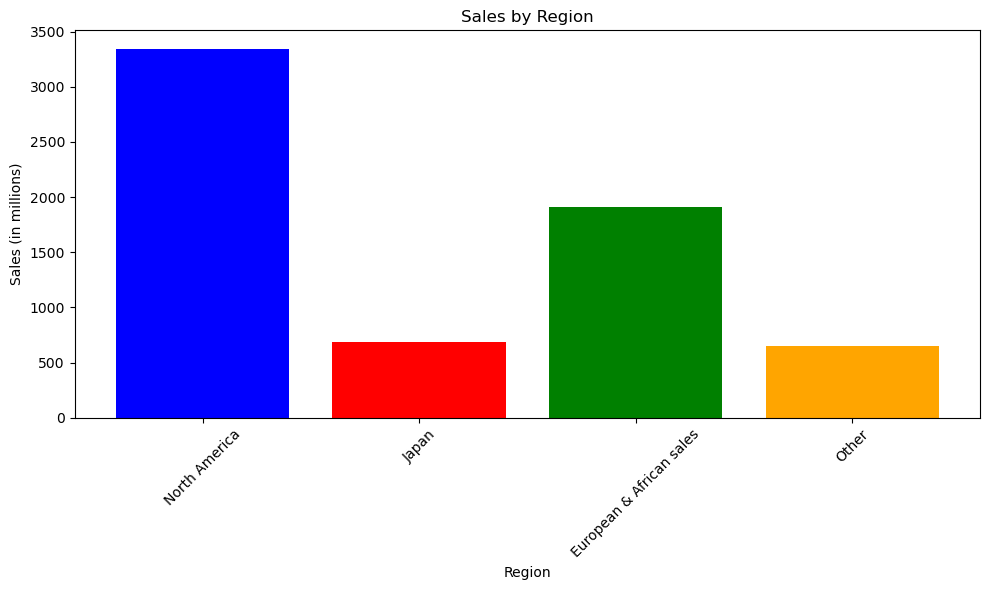

In [29]:
region_sales = {
    'North America': df['na_sales'].sum(),
    'Japan': df['jp_sales'].sum(),
    'European & African sales': df['pal_sales'].sum(),
    'Other': df['other_sales'].sum()
}

plt.figure(figsize=(10, 6))
plt.bar(region_sales.keys(), region_sales.values(), color=['blue', 'red', 'green', 'orange'])
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

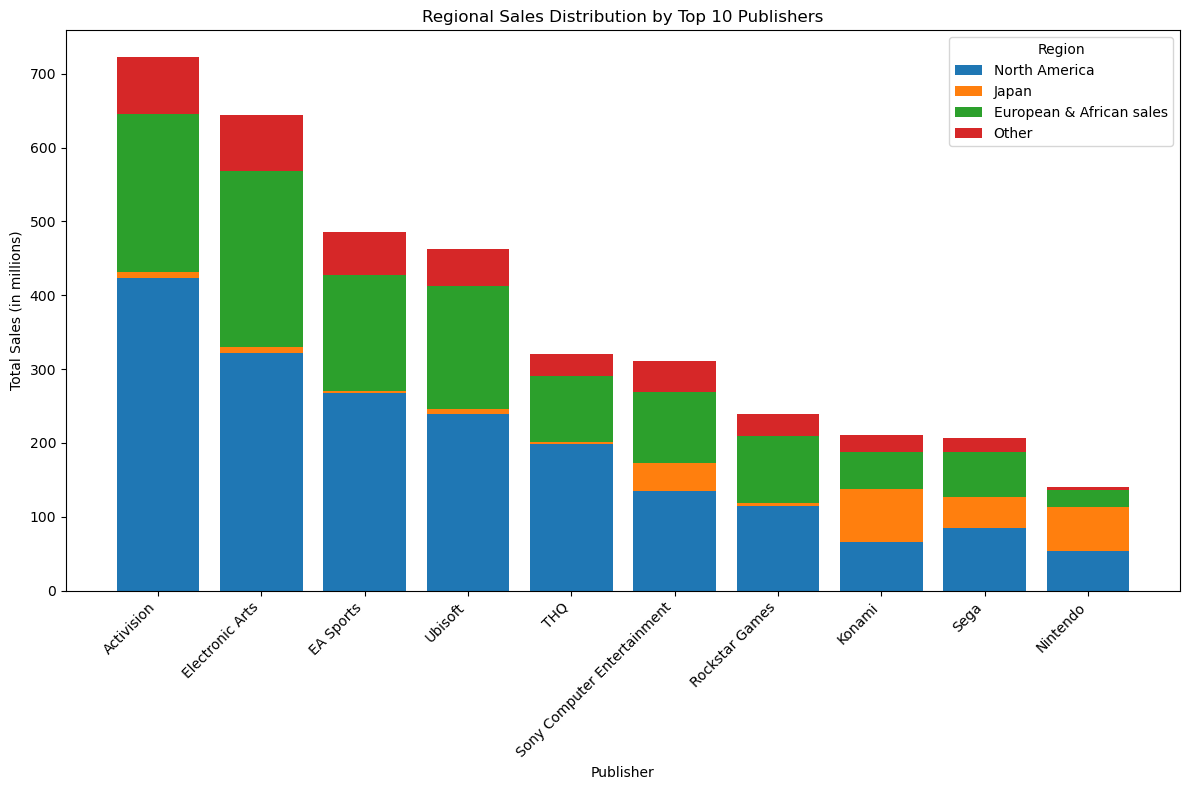

In [36]:
# Group by publisher and sum the sales for each region
publisher_sales = df.groupby('publisher').agg({
    'na_sales': 'sum',
    'jp_sales': 'sum',
    'pal_sales': 'sum',
    'other_sales': 'sum'
}).reset_index()

# Sort publishers by total sales
publisher_sales['total_sales'] = publisher_sales[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum(axis=1)
publisher_sales = publisher_sales.sort_values('total_sales', ascending=False).head(10)  # Top 10 publishers

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bottom = np.zeros(len(publisher_sales))

region_names = {
    'na_sales': 'North America',
    'jp_sales': 'Japan',
    'pal_sales': 'European & African sales',
    'other_sales': 'Other'
}

for region in ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']:
    p = ax.bar(publisher_sales['publisher'], publisher_sales[region], bottom=bottom, label=region_names[region])
    bottom += publisher_sales[region]

ax.set_title('Regional Sales Distribution by Top 10 Publishers')
ax.set_xlabel('Publisher')
ax.set_ylabel('Total Sales (in millions)')
ax.legend(title='Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

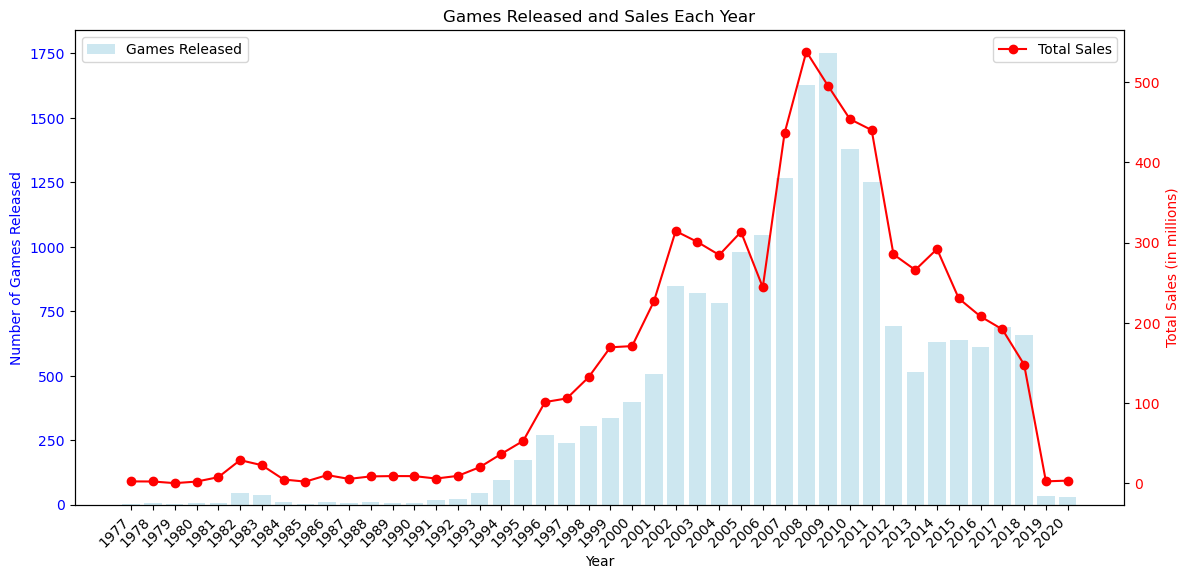

In [18]:
# Games released and sales each year
yearly_data['year'] = yearly_data['year'].astype(int)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(yearly_data['year'], yearly_data['games_released'], color='lightblue', label='Games Released', alpha=0.6)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Games Released', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(yearly_data['year'])
ax1.set_xticklabels(yearly_data['year'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(yearly_data['year'], yearly_data['total_sales'], color='red', marker='o', label='Total Sales')
ax2.set_ylabel('Total Sales (in millions)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Games Released and Sales Each Year')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.subplots_adjust(bottom=0.15)

plt.show()